In [119]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./datasets/titanic_new.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
df["Sex"] = df["Sex"].apply(lambda x: "male" if x == "m" else x)
df["Sex"] = df["Sex"].apply(lambda x: "female" if x == "f" else x)
df["Sex"] = df["Sex"].apply(lambda x: "female" if x == "fe" else x)

df = df[df["Age"].isna() == False]

In [3]:
# Wie viele Passagiere sind insgesamt an Bord gewesen und wie viele von ihnen
# haben überlebt?

people = df[df["Survived"] == 1]
print("von " + str(df.shape[0]) + " Passagieren haben " + str(people.shape[0]) + " überlebt" )

von 891 Passagieren haben 342 überlebt


In [35]:
df["Age"].min()

0.42

In [113]:
# Welche Faktoren hatten den größten Einfluss auf das Überleben (z.B. Alter,
# Geschlecht, Passagierklasse)?
ages = pd.unique(df["Age"]).tolist()
sexs = pd.unique(df["Sex"]).tolist()
p_classs = pd.unique(df["Pclass"]).tolist()
p_classs.sort()

survived_over_all = df[df["Survived"] == 1]

age_dic= {}

survived = df[df["Survived"] == 1] 

age_list = survived["Age"].tolist()
age_list.sort()

age_s_dic= {}

for x in df.iterrows():
    x = x[1]

    helper = round(x.Age/10)
    helper = str(helper*10) + "-"+str(helper)+"9"

    if x.Survived == 1:
        if helper in age_s_dic.keys():
            age_s_dic[helper] += 1
        else:
            age_s_dic[helper] = 1
    
    
    if helper in age_dic.keys():
        age_dic[helper] += 1
    else:
        age_dic[helper] = 1

age_dic = dict(sorted(age_dic.items()))
age_s_dic = dict(sorted(age_s_dic.items()))



for i in age_dic.keys():
    if i in age_s_dic.keys():
        print(str(i) + ": " + str(age_s_dic[i]))
        print("Survivel rate of "+ str(i)+ ": "+ str(100/age_dic[i]*age_s_dic[i]) + "%")
    else:
        print(str(i) + ": " + "0")
        print("Survivel rate of "+ str(i)+ ": 0%" )


    

print(" ")
print(" ")
for sex in sexs:
    survived = df[df["Sex"] == sex]
    survived = survived[survived["Survived"]  == 1]
    print(str(sex)+ "  " +str(survived["Age"].count()))
    print("Survivel rate of "+ str(sex)+ ": "+ str(100/int(df[df["Sex"] == sex]["Age"].count()) * int(survived["Age"].count())) + "%")
print(" ")
print(" ")

for p_class in p_classs:
    survived = df[df["Pclass"] == p_class]
    survived = survived[survived["Survived"]  == 1]
    print(str(p_class)+ "  " +str(survived["Age"].count()))
    print("Survivel rate of "+ str(p_class)+ ": "+ str(100/int(df[df["Pclass"] == p_class]["Age"].count()) * int(survived["Age"].count())) + "%")


ihkim = df[df["Sex"] == "female"]
ihkim = ihkim[ihkim["Pclass"] == 1]  
ihkim_s = ihkim[ihkim["Survived"] == 1]

print("Survivel rate of Women in first class: "+ str(100/ihkim["Age"].count() * ihkim_s["Age"].count())+ "%")

0-09: 31
Survivel rate of 0-09: 70.45454545454547%
10-19: 14
Survivel rate of 10-19: 41.1764705882353%
20-29: 79
Survivel rate of 20-29: 35.426008968609864%
30-39: 72
Survivel rate of 30-39: 40.449438202247194%
40-49: 56
Survivel rate of 40-49: 42.42424242424242%
50-59: 25
Survivel rate of 50-59: 40.98360655737705%
60-69: 12
Survivel rate of 60-69: 35.294117647058826%
70-79: 0
Survivel rate of 70-79: 0%
80-89: 1
Survivel rate of 80-89: 100.0%
 
 
male  93
Survivel rate of male: 20.52980132450331%
female  197
Survivel rate of female: 75.47892720306514%
 
 
1  122
Survivel rate of 1: 65.59139784946237%
2  83
Survivel rate of 2: 47.97687861271677%
3  85
Survivel rate of 3: 23.943661971830988%
Survivel rate of Women in first class: 96.47058823529412%


In [118]:
#Wie viele Familienmitglieder (SipSp + Parch) hatten die Passagiere im Durchschnitt
# an Bord und hat dies das Überlebensverhältnis beeinflusst?
all = 0
for x in df.iterrows():
    x = x[1]
    all += x.SibSp
    all += x.Parch

print(str(all/df.shape[0]))

with_p = 0
with_p_s = 0

without = 0
without_s= 0
for x in df.iterrows():
    x = x[1]

    if x.SibSp > 0 or x.Parch > 0:
        if x.Survived:
            with_p_s += 1
        with_p += 1
    else:
        if x.Survived:
            without_s += 1
        without += 1

print("with Fameliy Survivel rate of: " + str(100/with_p*with_p_s))
print("without Fameliy Survivel rate of: " + str(100/without*without_s))



0.9439775910364145
with Fameliy Survivel rate of: 51.61290322580645
without Fameliy Survivel rate of: 32.17821782178218


dict_items([('0-09', 44), ('10-19', 34), ('20-29', 223), ('30-39', 178), ('40-49', 132), ('50-59', 61), ('60-69', 34), ('70-79', 7), ('80-89', 1)])


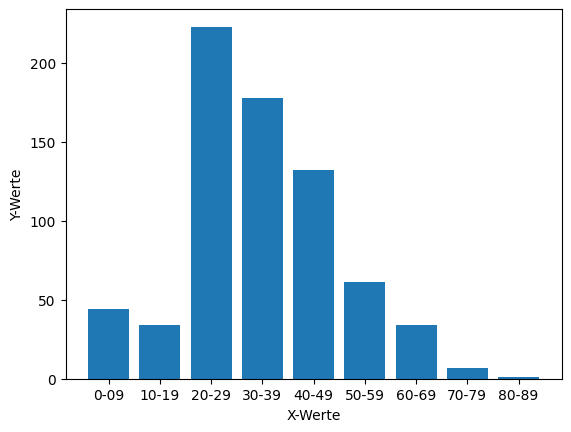

In [124]:
# Visualisiere die Verteilung des Alters der Passagiere.
print(age_dic.items())
xwerte = age_dic.keys()
ywerte = [age_dic[i] for i in xwerte]
plt.bar(xwerte, ywerte)
plt.xlabel("Age")
plt.ylabel("num of people")
plt.show()